In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('Wrangled_data_cap2.csv',encoding='latin-1',
                   index_col='Date',parse_dates=True).iloc[:,1:]
data.head()

,Demand(MW),Forecast(MW),Temp,Name,holiday,DofWk,daylight
Date,,,,,,,
2015-07-01 00:00:00,5250.0,5587.0,68.0,NaN,0,3.0,0
2015-07-01 01:00:00,4847.0,5447.0,68.0,NaN,0,3.0,0
2015-07-01 02:00:00,4593.0,5220.0,66.9,NaN,0,3.0,0
2015-07-01 03:00:00,4473.0,4960.0,70.0,NaN,0,3.0,0
2015-07-01 04:00:00,4512.0,4727.0,69.1,NaN,0,3.0,0


In [5]:
# group features by day
day1 = data.iloc[:,:2].groupby(pd.Grouper(freq='1D')).aggregate(np.sum)
weather = data[data['Temp']!=0].iloc[:,2:5].groupby(pd.Grouper(freq='1D')).aggregate(np.mean)
weekdays = data.iloc[:,5:6].groupby(pd.Grouper(freq='1D')).aggregate(np.max)
day1 = day1.merge(weather,right_index=True,left_index=True).merge(weekdays,
                 right_index=True,left_index=True).fillna(0)
for i in day1.iloc[:,:-2]:
    print('---------------\n','Max',i)
    print(day1[day1[i]== day1[i].max()])
print(day1.describe().iloc[:,:-2])

---------------
 Max Demand(MW)
            Demand(MW)  Forecast(MW)       Temp  holiday  DofWk
Date                                                           
2018-03-09    156550.0      147235.0  59.416364      0.0    7.0
---------------
 Max Forecast(MW)
            Demand(MW)  Forecast(MW)       Temp  holiday  DofWk
Date                                                           
2018-03-09    156550.0      147235.0  59.416364      0.0    7.0
---------------
 Max Temp
            Demand(MW)  Forecast(MW)       Temp  holiday  DofWk
Date                                                           
2015-09-09    121425.0      101415.0  87.629167      0.0    3.0
          Demand(MW)   Forecast(MW)         Temp
count    1007.000000    1007.000000  1007.000000
mean    78779.106256   77875.169811    65.727655
std     13642.215929   12867.568313     9.059733
min         0.000000       0.000000     0.000000
25%     71215.500000   70865.000000    60.720833
50%     75238.000000   74884.000000   

In [6]:
#restructure weekdays df to allow easy plotting
weekdays = pd.DataFrame(day1['Demand(MW)'].values,index=day1.DofWk,columns=['Demand(MW)'])
weekdays = weekdays[weekdays['Demand(MW)']!=0]
weekdays.index=weekdays.index.map(str)

In [7]:
#grouped by week df
day7 = data.iloc[:,:2].groupby(pd.Grouper(freq='7D')).aggregate(np.sum)
weather7 = data[data['Temp']!=0].iloc[:,2:4].groupby(pd.Grouper(freq='7D')).aggregate(np.mean)
holidays7 = data.iloc[:,4:5].groupby(pd.Grouper(freq='7D')).aggregate(np.max)
day7 = day7.merge(weather7,right_index=True,left_index=True).merge(holidays7,
                 right_index=True,left_index=True)
for i in day7.iloc[:,:-1]:
    print('---------------\n','Max',i)
    print(day7[day7[i]== day7[i].max()])
print(day1.describe().iloc[:,:-2])

---------------
 Max Demand(MW)
            Demand(MW)  Forecast(MW)       Temp  holiday
Date                                                    
2017-08-30    810047.0      807483.0  83.089222        1
---------------
 Max Forecast(MW)
            Demand(MW)  Forecast(MW)       Temp  holiday
Date                                                    
2017-08-30    810047.0      807483.0  83.089222        1
---------------
 Max Temp
            Demand(MW)  Forecast(MW)       Temp  holiday
Date                                                    
2017-08-30    810047.0      807483.0  83.089222        1
          Demand(MW)   Forecast(MW)         Temp
count    1007.000000    1007.000000  1007.000000
mean    78779.106256   77875.169811    65.727655
std     13642.215929   12867.568313     9.059733
min         0.000000       0.000000     0.000000
25%     71215.500000   70865.000000    60.720833
50%     75238.000000   74884.000000    65.681818
75%     84840.000000   84117.000000    71.716667
max

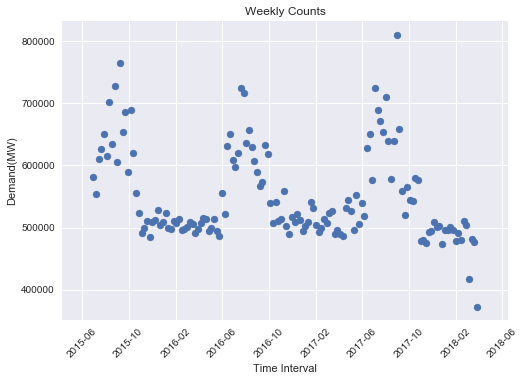

          Demand(MW)
count     144.000000
mean   550906.666667
std     73859.702344
min    372985.000000
25%    499526.750000
50%    518044.000000
75%    599445.250000
max    810047.000000


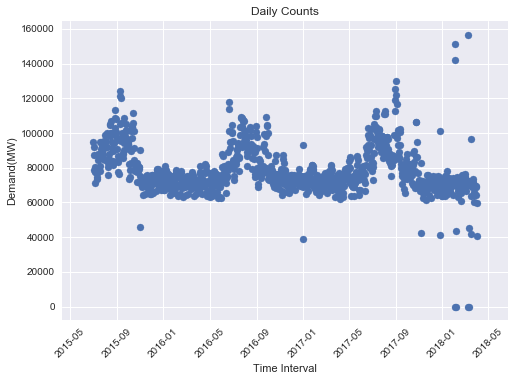

          Demand(MW)
count    1007.000000
mean    78779.106256
std     13642.215929
min         0.000000
25%     71215.500000
50%     75238.000000
75%     84840.000000
max    156550.000000


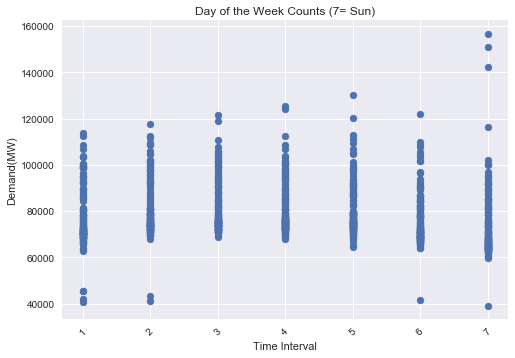

          Demand(MW)
count    1003.000000
mean    79093.280160
std     12727.103589
min     39073.000000
25%     71244.500000
50%     75259.000000
75%     84858.500000
max    156550.000000


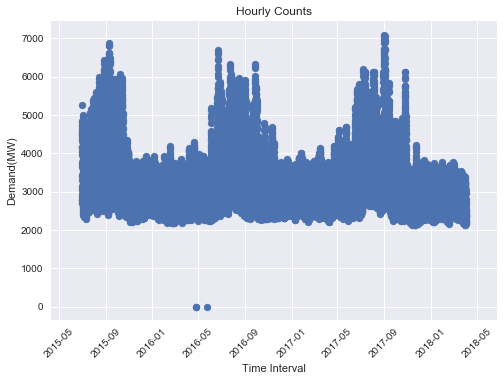

         Demand(MW)
count  24128.000000
mean    3287.904509
std      754.253462
min        0.000000
25%     2730.750000
50%     3185.000000
75%     3591.000000
max     7095.000000


In [26]:
#Demand Over Time Visualization
titles= ['Weekly Counts','Daily Counts','Day of the Week Counts (7= Sun)',
         'Hourly Counts']

for i,t in zip([day7['Demand(MW)'],day1['Demand(MW)'],weekdays,data['Demand(MW)']],titles):
    try:
        i = i.to_frame('Demand(MW)')
        plt.scatter(i.index,i['Demand(MW)'])
        plt.xticks(rotation=45)
        plt.title(t)
        plt.ylabel('Demand(MW)')
        plt.xlabel('Time Interval')
        plt.show()
        print(i.describe())
    except:
        plt.scatter(i.index,i['Demand(MW)'])
        plt.xticks(rotation=45)
        plt.title(t)
        plt.ylabel('Demand(MW)')
        plt.xlabel('Time Interval')
        plt.show()
        print(i.describe())

The first chart above, 'Weekly Counts', displays the total Demand of each week over the 2+ year time span that the data covers. we can see that there is a clear cyclical pattern with Demand rising considerably in the Summer time.

The second chart displays total Demand of each day which illustrates the same pattern as the Weekly Connts but at a higher resolution. We can see that there are some outliers however the same general pattern is present with Demand being higher in Summer time.

Next we have Demand aggregated by Day of the Week and we can see that Demand is relatively even across the 7 days of the week. Sunday has the most outliers and Friday seems to have the highest Demand, but the concrentation of data is very similar across all days of the week.

Lastly, the final chart plots all hourly Demand data and shows us the same Summer time trend for Demand. It also reveals some missing Demand data which will be helpful for missing values analysis later on. With this we can say confidently that Demand rises in the Summer and falls in the Winter.

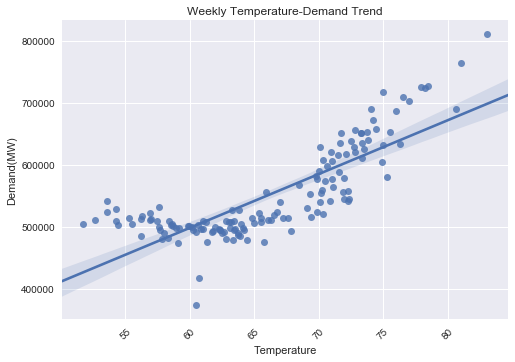

Pearson Correlation = 0.815332159209
          Demand(MW)   Forecast(MW)        Temp
count     144.000000     144.000000  144.000000
mean   550906.666667  544585.388889   66.089401
std     73859.702344   72049.542577    6.943017
min    372985.000000  369048.000000   51.710119
25%    499526.750000  495176.000000   60.671685
50%    518044.000000  515494.000000   65.511415
75%    599445.250000  593978.000000   71.767577
max    810047.000000  807483.000000   83.089222


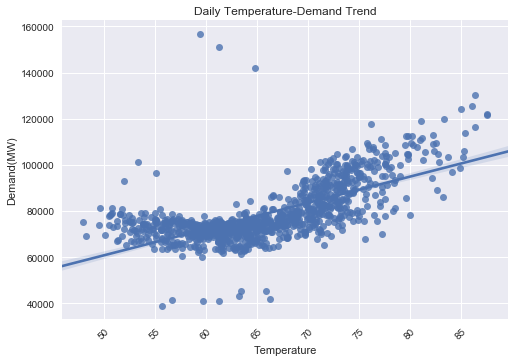

Pearson Correlation = 0.671013684734
          Demand(MW)   Forecast(MW)         Temp
count    1001.000000    1001.000000  1001.000000
mean    79125.234765   78213.904096    66.121627
std     12718.925393   11908.047013     7.516323
min     39073.000000   38467.000000    47.954167
25%     71274.000000   70908.000000    60.816667
50%     75284.000000   74914.000000    65.713043
75%     84877.000000   84340.000000    71.720833
max    156550.000000  147235.000000    87.629167


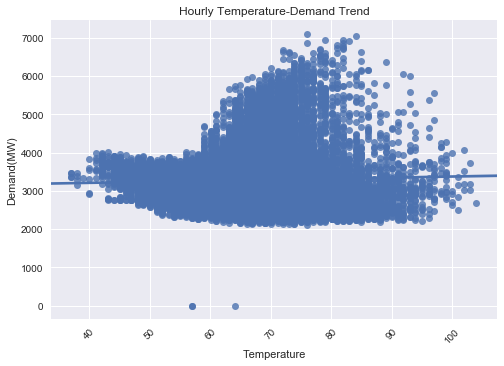

Pearson Correlation = 0.0355055610992
         Demand(MW)  Forecast(MW)          Temp
count  23647.000000  23654.000000  23678.000000
mean    3282.849622   3244.505623     66.117717
std      750.852602    739.554540      9.682535
min        0.000000   2100.000000     37.000000
25%     2727.000000   2687.000000     59.000000
50%     3182.000000   3138.000000     66.000000
75%     3587.000000   3568.000000     72.000000
max     7095.000000   7043.000000    104.000000


In [31]:
#Demand vs. Temp Visualization
titles2= ['Weekly Temperature-Demand Trend','Daily Temperature-Demand Trend',
         'Hourly Temperature-Demand Trend']

for i,t in zip([day7,day1[day1['Temp']!=0],data[data['Temp']!=0]],titles2):
        sns.regplot(x="Temp", y="Demand(MW)", data=i)
        plt.xticks(rotation=45)
        plt.title(t)
        plt.xlabel('Temperature')
        plt.ylabel('Demand(MW)')
        plt.show()
        dust = i[i['Demand(MW)'].isnull()==False]
        cor = np.corrcoef(dust["Temp"], dust["Demand(MW)"])
        print('Pearson Correlation =',cor[0,1])
        print(i.describe().iloc[:,:3])

The plots above display the correlation between Demand and Temperature with a regression line and the Pearson Correlation coefficient. Thee is a positive correlation between the 2 features no matter what time frame we look at but the correlation is the strongest when we consider it with the data aggregated by week. For both the Week and Day plots, Demand is summed and Temperature is averaged, thus the Hour plot is a very different shape from the other two because of its raw form.

These findings further support the pattern we saw earlier in Demand across time beacuse at Temperature rises, Demand goes up, and Summer time tends to be the peak Demand area for this reason.

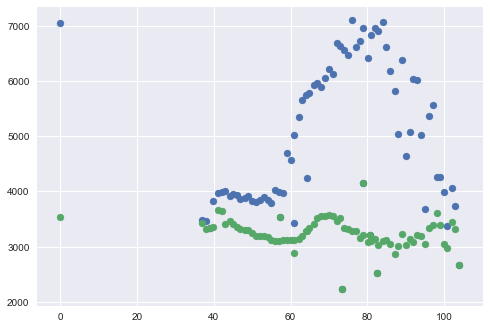

In [9]:
test1 = data.iloc[:,:3].groupby(by='Temp').aggregate(np.mean)
test2 = data.iloc[:,:3].groupby(by='Temp').aggregate(np.max)

plt.scatter(test2.index,test2['Demand(MW)'])
plt.scatter(test1.index,test1['Demand(MW)'])
plt.show()

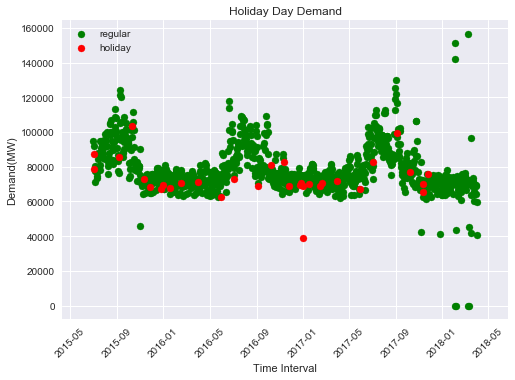

---------------
 Holiday Day Stats
          Demand(MW)  Forecast(MW)       Temp
count      32.000000      32.00000  32.000000
mean    73263.718750   73103.12500  64.245626
std     11160.838063   10788.81749   8.645481
min     39073.000000   38467.00000  50.173913
25%     68657.000000   68896.25000  57.962636
50%     70460.500000   71721.00000  63.392210
75%     77422.000000   74321.75000  70.311277
max    103615.000000  103997.00000  83.725000
---------------
 Holiday Day Top 5 Demand
            Demand(MW)  Forecast(MW)       Temp  holiday  DofWk
Date                                                           
2015-10-12    103615.0       92714.0  83.725000      1.0    1.0
2017-09-04     99413.0      103997.0  77.645833      1.0    1.0
2015-07-03     87131.0       95400.0  69.400000      1.0    5.0
2015-09-07     85732.0       74486.0  79.629167      1.0    1.0
2017-07-04     82590.0       73501.0  71.620833      1.0    2.0


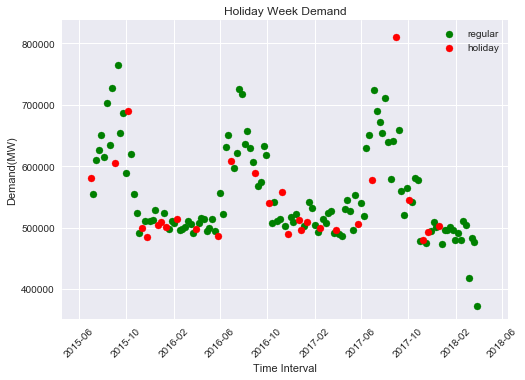

---------------
 Holiday Week Stats
          Demand(MW)   Forecast(MW)       Temp
count      28.000000      28.000000  28.000000
mean   538598.214286  534385.392857  64.659376
std     72506.323195   69657.429608   8.070737
min    479982.000000  475273.000000  51.710119
25%    497414.750000  492584.000000  57.680208
50%    507519.000000  512582.000000  64.053571
75%    562790.750000  563634.750000  70.019888
max    810047.000000  807483.000000  83.089222
---------------
 Holiday Week Top 5 Demand
            Demand(MW)  Forecast(MW)       Temp  holiday
Date                                                    
2017-08-30    810047.0      807483.0  83.089222        1
2015-10-07    689287.0      630016.0  80.670833        1
2016-06-29    607920.0      601605.0  70.336905        1
2015-09-02    605056.0      562500.0  74.930952        1
2016-08-31    589395.0      586620.0  69.998204        1


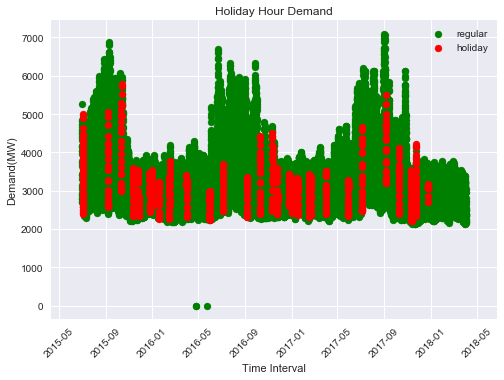

---------------
 Holiday Hour Stats
        Demand(MW)  Forecast(MW)        Temp
count   792.000000    792.000000  792.000000
mean   3084.185606   3066.042929   62.117298
std     612.586405    624.290759   14.815457
min    2200.000000   2182.000000    0.000000
25%    2637.500000   2584.750000   55.000000
50%    2998.000000   2990.500000   63.000000
75%    3318.500000   3342.250000   70.000000
max    5795.000000   6069.000000   93.900000
---------------
 Holiday Hour Top 5 Demand
                     Demand(MW)  Forecast(MW)  Temp          Name  holiday  \
Date                                                                         
2015-10-12 23:00:00      5795.0        5218.0  82.9  Columbus Day        1   
2015-10-12 22:00:00      5741.0        5086.0  84.9  Columbus Day        1   
2015-10-12 21:00:00      5512.0        4838.0  87.1  Columbus Day        1   
2017-09-04 00:00:00      5496.0        5727.0  78.1     Labor Day        1   
2015-10-12 00:00:00      5292.0        4888.0  7

In [8]:
#Holiday by Week and Day
for i,t in zip([day1,day7,data],['Day','Week','Hour']):
    plt.scatter(i[i['holiday']==0].index,i[i['holiday']==0]['Demand(MW)'],
                color='green')
    plt.scatter(i[i['holiday']==1].index,i[i['holiday']==1]['Demand(MW)'],
                color='red')
    plt.xticks(rotation=45)
    plt.title('Holiday %s Demand'%t)
    plt.legend(['regular','holiday'])
    plt.ylabel('Demand(MW)')
    plt.xlabel('Time Interval')
    plt.show()
    print('---------------\n','Holiday %s Stats'%t)
    print(i[i['holiday']==1].describe().iloc[:,:3])
    print('---------------\n','Holiday %s Top 5 Demand'%t)
    print(i[i['holiday']==1].sort_values(by='Demand(MW)',ascending=False).head(5))

The plots above display the Demand on holidays with the holiday figures in red and the normal non holiday figures in green. The first plot shows the holidays themselves in relation to other days and the second plot shows weeks that contain holidays compared to week that do not contain a holiday. The lat plot shows the hourly Demand on the holidays layed over the hourly Demand of all other days.

We can see that all in all holidays do not deviate too much from the normal days with only a few holidays having higher Demand that normal and only one have less than normal.

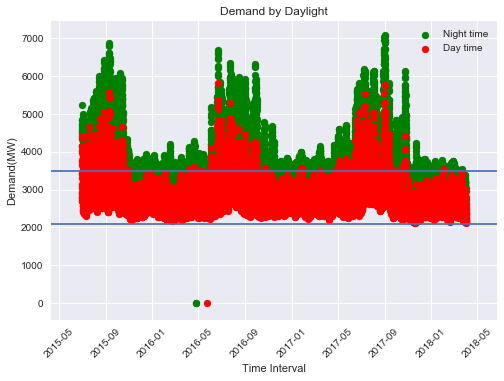

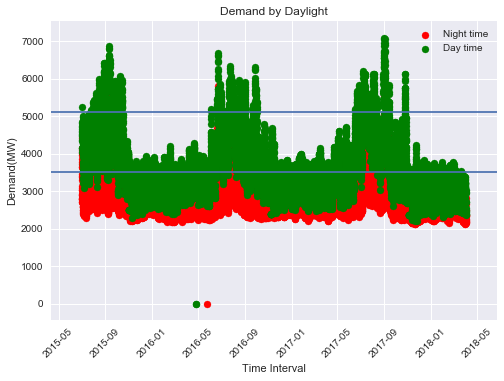

In [29]:
#Demand by Daylight
plt.scatter(data[data['daylight']==0].index,data[data['daylight']==0]['Demand(MW)'],
            color='green')
plt.scatter(data[data['daylight']==1].index,data[data['daylight']==1]['Demand(MW)'],
            color='red')
plt.legend(['Night time','Day time'])
plt.axhline(2100)
plt.axhline(3500)
plt.xticks(rotation=45)
plt.ylabel('Demand(MW)')
plt.xlabel('Time Interval')
plt.title('Demand by Daylight')
plt.show()

plt.scatter(data[data['daylight']==1].index,data[data['daylight']==1]['Demand(MW)'],
            color='red')
plt.scatter(data[data['daylight']==0].index,data[data['daylight']==0]['Demand(MW)'],
            color='green')
plt.legend(['Night time','Day time'])
plt.axhline(5100)
plt.axhline(3500)
plt.xticks(rotation=45)
plt.ylabel('Demand(MW)')
plt.xlabel('Time Interval')
plt.title('Demand by Daylight')
plt.show()

Above we have hourly Demand plotted based on Daylight with the area between the horizontal lines indicating over lap. Both plots display the same data but with a different time of day on top to show the considerable overlap in hourly Demand. 
As we might have imagined, Demand is consistantly higher in at night, however there are some day time points that rival the night time Demand closely.